# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Reading  our dataset


In [3]:
data=pd.read_csv("data.csv")

<Axes: xlabel='X', ylabel='Y'>

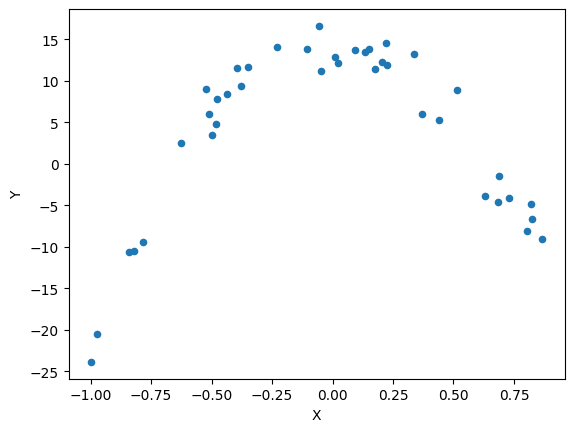

In [4]:
#plt.scatter(data)
#draw_polynomial(coefs)
data.plot.scatter(x='X',
                      y='Y',)

## Training a polynomial regression model

In [7]:
X = data['X'].to_numpy()
print(X)

[ 0.6888437  -0.4821665   0.02254944 -0.39337455 -0.04680609  0.00937371
 -0.43632431 -0.49898732  0.81949251  0.8043319  -0.37970486  0.36796786
 -0.05571457  0.22177395  0.82602211  0.73061986 -0.47901538 -0.9719166
  0.43940937  0.3363064  -0.99771436 -0.51217825 -0.34959127  0.13502148
 -0.52276814 -0.10406086 -0.83910836  0.86566765 -0.78188431  0.09488182
  0.62893373  0.20637126  0.17523413 -0.23019771  0.15130203 -0.62654094
  0.22554636 -0.82035128  0.51520784  0.68492045]


In [8]:
Y = data['Y'].to_numpy()
print(Y)

[ -1.50331368   4.77622339  12.08795704  11.55265538  11.13939452
  12.81072906   8.43795507   3.51121191  -4.87995593  -8.03685852
   9.4127869    6.01416159  16.61258823  14.54074321  -6.65370146
  -4.15748388   7.82406269 -20.43535444   5.23827144  13.25800621
 -23.85880299   5.98081557  11.6168873   13.415138     8.96629721
  13.89062574 -10.65848472  -9.07349526  -9.36780551  13.69341943
  -3.83377459  12.21887699  11.3908      14.05797289  13.8738553
   2.51529282  11.96014141 -10.4494808    8.95065314  -4.58876989]


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [9]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [10]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [12]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [13]:
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)

LinearRegression()

Training error (rmse): 0.4906868012457545
Testing error (rmse): 859852.1617466568


NameError: name 'draw_polynomial' is not defined

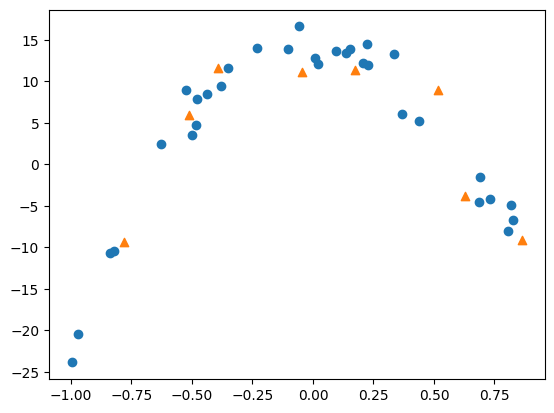

In [14]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [15]:
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.1)
model_L1_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

Training error (rmse): 2.107878995835599
Testing error (rmse): 2.3711867464187897


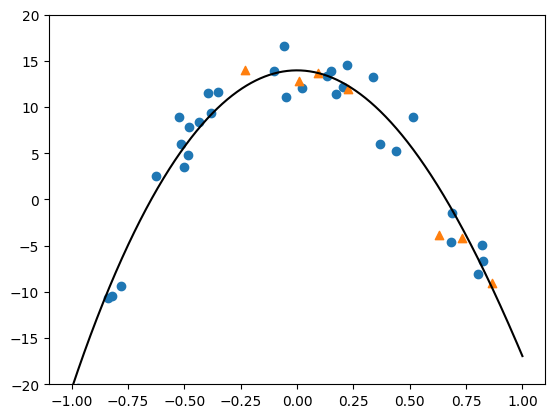

Polynomial coefficients
[np.float64(13.973658129404456), np.float64(0.0), np.float64(-32.716441629277085), np.float64(0.6427026572023549), np.float64(-0.0), np.float64(1.1509541189515784), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.flo

In [14]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [15]:
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.1)
model_L2_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

Training error (rmse): 2.0383522846644353
Testing error (rmse): 4.362420183796024


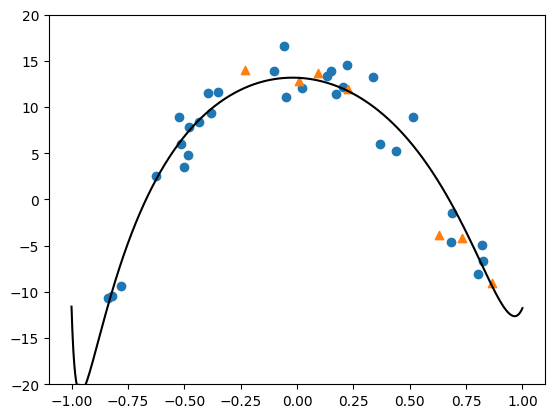

Polynomial coefficients
[np.float64(13.173991689418116), np.float64(-0.9248870503846494), np.float64(-23.658263209141726), np.float64(0.8778307097670348), np.float64(-10.454690582677133), np.float64(2.0600077752250683), np.float64(-3.84846661952393), np.float64(2.0579396028591725), np.float64(-0.8744141258719209), np.float64(1.6119980828513167), np.float64(0.40411901820402174), np.float64(1.0864196551872662), np.float64(0.8898806224480874), np.float64(0.6299995521694133), np.float64(1.0128679961356348), np.float64(0.28323017218580904), np.float64(0.9802419952301916), np.float64(0.03980911711906232), np.float64(0.890297729179535), np.float64(-0.12147120221873631), np.float64(0.7877719572085999), np.float64(-0.22278093854031378), np.float64(0.6913771456637771), np.float64(-0.2824592667271628), np.float64(0.6075373707058224), np.float64(-0.3142039742475665), np.float64(0.5371724516374643), np.float64(-0.32769336344798716), np.float64(0.47898282172661777), np.float64(-0.32953765422815684),

In [16]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.482166,4.776223,7.355760,6.382247,7.906608
1,0.206371,12.218877,13.388824,12.446600,11.563918
2,0.151302,13.873855,11.814371,13.131709,12.264455
3,0.094882,13.693419,17.714830,13.624607,12.813585
4,-0.046806,11.139395,15.883550,13.926671,13.451202
5,-0.512178,5.980816,1.562698,5.370125,6.976154
6,0.515208,8.950653,3040.507678,4.976564,4.406290
7,0.730620,-4.157484,-17948.522595,-3.481490,-3.833402


### Real Example (Predict fuel efficiency)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [ ]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [ ]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [ ]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [ ]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
